TASK

- Import NMDB shapefiles
- Clip to a catchment to use as our test area
- Give each polygon a unique ID, something like catchment_1, catchment_2 etc
- export shapefile for use in irrigatedWIT

In [4]:
import numpy as np
import xarray as xr
import geopandas as gpd
import pandas as pd

In [5]:
catchmentName = 'CONDAMINE-CULGOA'
year = "2013"
nmdb_shp = "results/nmdb/nmdb_Summer2013_14/nmdb_Summer2013_14_Irrigated_OEHandLS_masked.shp"
catchment = 'data/spatial/nmdb_individual_catchments/CONDAMINE-CULGOA RIVERS.shp'

In [6]:
#import files and clip
nmdb_irr = gpd.read_file(nmdb_shp)
catch = gpd.read_file(catchment)
subcath_irr = gpd.overlay(nmdb_irr, catch, how='intersection')

In [7]:
#add a unique ID
subcath_irr['UniqueID'] = [catchmentName+"_"+year+"_"+str(i) for i in subcath_irr.index]

In [8]:
subcath_irr.tail()

,DN,area,AREA,PERIMETER,AUS_,AUS_ID,F_CODE,BNAME,BNUM,RNAME,RNUM,DNAME,DNUM,CENTROID_Y,CENTROID_X,geometry,UniqueID
804,80,1655000.0,12.463765,25.092594,1304,876,dbasin_cent,CONDAMINE-CULGOA RIVERS,22,CONDAMINE,K,MURRAY-DARLING,IV,-27.337341,148.558049,"POLYGON ((1540625 -3348650, 1540700 -3348650, ...",CONDAMINE-CULGOA_2013_804
805,70,195000.0,12.463765,25.092594,1304,876,dbasin_cent,CONDAMINE-CULGOA RIVERS,22,CONDAMINE,K,MURRAY-DARLING,IV,-27.337341,148.558049,"POLYGON ((1504925 -3360275, 1505100 -3360275, ...",CONDAMINE-CULGOA_2013_805
806,70,247500.0,12.463765,25.092594,1304,876,dbasin_cent,CONDAMINE-CULGOA RIVERS,22,CONDAMINE,K,MURRAY-DARLING,IV,-27.337341,148.558049,"POLYGON ((1507100 -3361300, 1507125 -3361300, ...",CONDAMINE-CULGOA_2013_806
807,70,527500.0,12.463765,25.092594,1304,876,dbasin_cent,CONDAMINE-CULGOA RIVERS,22,CONDAMINE,K,MURRAY-DARLING,IV,-27.337341,148.558049,"POLYGON ((1486250 -3361350, 1486300 -3361350, ...",CONDAMINE-CULGOA_2013_807
808,75,903125.0,12.463765,25.092594,1304,876,dbasin_cent,CONDAMINE-CULGOA RIVERS,22,CONDAMINE,K,MURRAY-DARLING,IV,-27.337341,148.558049,"POLYGON ((1483375 -3362625, 1483425 -3362625, ...",CONDAMINE-CULGOA_2013_808


In [9]:
#export to file for use in WIT analysis
subcath_irr.to_file('results/irrigatedWIT/shapes/'+catchmentName+"_"+year+"_WIT.shp")

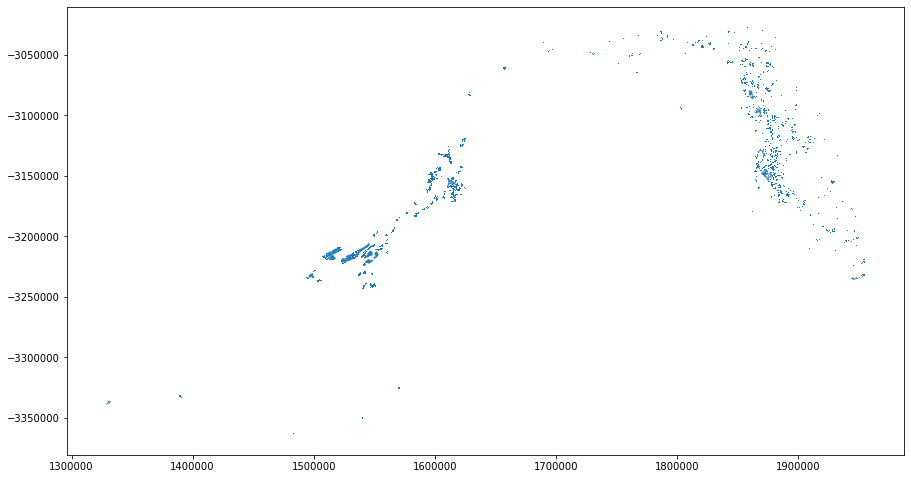

In [11]:
subcath_irr.plot(figsize=(15,15))